In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import tensorflow_model_optimization as tfmot

In [12]:
imagesize = 175
channels = 3

train_data = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    rotation_range=10


)

train_generator = train_data.flow_from_directory(
    'drowsiness/train',
    target_size = (imagesize,imagesize),
    batch_size=16,
    class_mode = 'sparse',


)



Found 1160 images belonging to 2 classes.


In [13]:
validation_data = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    rotation_range=10


)

validation_generator = validation_data.flow_from_directory(
    'drowsiness/val',
    target_size = (imagesize,imagesize),
    batch_size=16,
    class_mode = 'sparse',
)

Found 144 images belonging to 2 classes.


In [14]:
test_data = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    rotation_range=10


)
test_generator = test_data.flow_from_directory(
    'drowsiness/test',
    target_size = (imagesize,imagesize),
    batch_size=16,
    class_mode = 'sparse',

)


Found 148 images belonging to 2 classes.


In [15]:
print(train_generator.class_indices)
class_names = list(train_generator.class_indices.keys())

{'closed': 0, 'open': 1}


In [16]:
input_shape = (imagesize, imagesize, channels)
n_classes = 2

model = models.Sequential([
    layers.InputLayer(input_shape = input_shape),
    layers.Conv2D(32,(3,3), activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
   
    layers.Flatten(),
    layers.Dense(64 , activation = 'relu'),
    layers.Dense(n_classes, activation = 'softmax'), # activation  softmax is normalize the activation of the classes
])

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 173, 173, 32)      896       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 86, 86, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 84, 84, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 42, 42, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 40, 40, 64)        36928     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 20, 20, 64)      

In [18]:
model.compile(
    optimizer = 'adam',  # adam is a famouse optimizer in deep learning
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
    )

In [11]:
144/16


9.0

In [19]:
history = model.fit( # records every history of epochs
    train_generator,
    steps_per_epoch=72,
    batch_size = 32,
    validation_data = validation_generator,
    validation_steps=9,
    verbose = 1,
    epochs = 10, # choki epoch mangpu run ai na oma 10 sho run awa, if possible 100 epoch run ai, i 
    
    
)

Epoch 1/10
72/72 [==============================] - 48s 645ms/step - loss: 0.3688 - accuracy: 0.8243 - val_loss: 0.2860 - val_accuracy: 0.8611
Epoch 2/10
72/72 [==============================] - 46s 636ms/step - loss: 0.1629 - accuracy: 0.9379 - val_loss: 0.2595 - val_accuracy: 0.8750
Epoch 3/10
72/72 [==============================] - 45s 621ms/step - loss: 0.1303 - accuracy: 0.9598 - val_loss: 0.0744 - val_accuracy: 0.9792
Epoch 4/10
72/72 [==============================] - 44s 613ms/step - loss: 0.0839 - accuracy: 0.9685 - val_loss: 0.0544 - val_accuracy: 0.9792
Epoch 5/10
72/72 [==============================] - 44s 615ms/step - loss: 0.0638 - accuracy: 0.9773 - val_loss: 0.0970 - val_accuracy: 0.9722
Epoch 6/10
72/72 [==============================] - 47s 648ms/step - loss: 0.0585 - accuracy: 0.9790 - val_loss: 0.0766 - val_accuracy: 0.9861
Epoch 7/10
72/72 [==============================] - 44s 612ms/step - loss: 0.0520 - accuracy: 0.9799 - val_loss: 0.0561 - val_accuracy: 0.9722

In [20]:
score = model.evaluate(test_generator)

10/10 [==============================] - 3s 269ms/step - loss: 0.0535 - accuracy: 0.9865


In [21]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, ' Training  and Validation Accuracy')

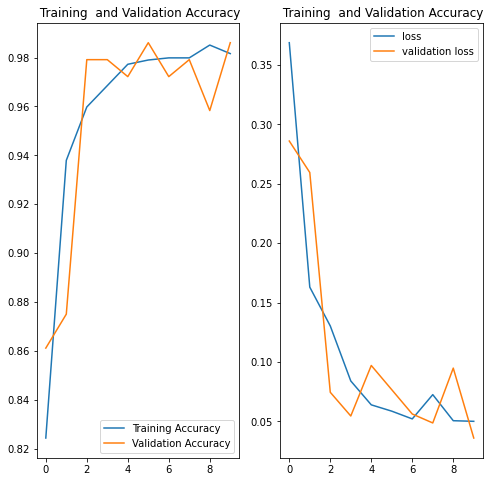

In [23]:
epochs = 10
plt.figure(figsize = (8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), acc , label ='Training Accuracy')
plt.plot(range(epochs), val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title(' Training  and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(epochs), loss , label ='loss')
plt.plot(range(epochs), val_loss, label = 'validation loss')
plt.legend(loc = 'upper right')
plt.title(' Training  and Validation Accuracy')

first image to predict
actual label: open
predicted label: open


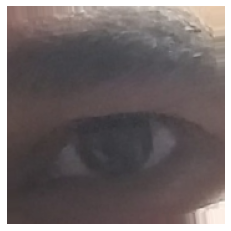

In [24]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    plt.axis('off')
    
    break


In [25]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

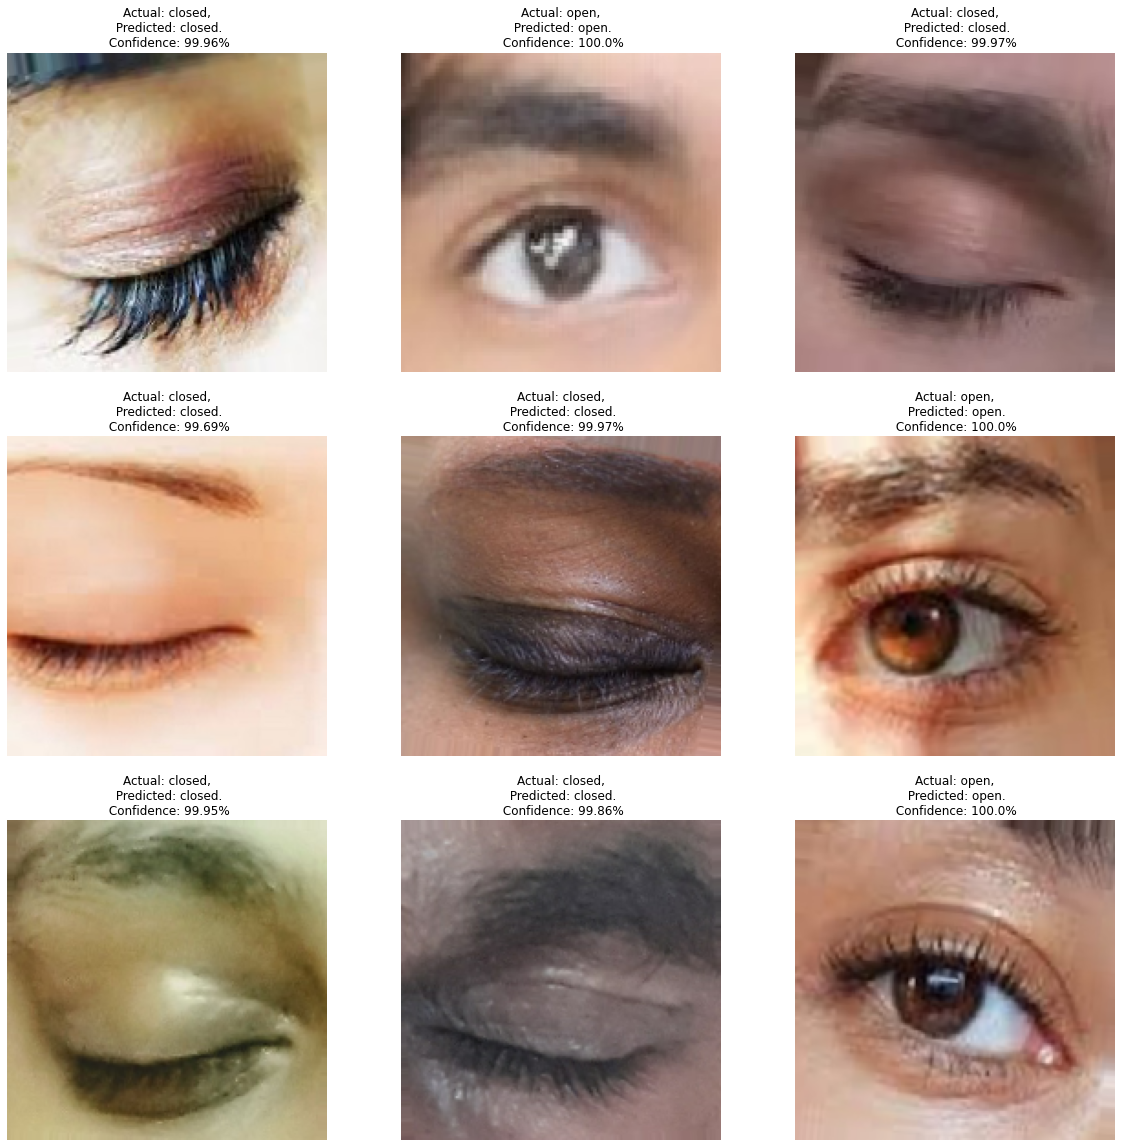

In [29]:
plt.figure(figsize=(20, 20))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [30]:
model = model.save("drowsiness")

INFO:tensorflow:Assets written to: drowsiness\assets


In [32]:
converter = tf.lite.TFLiteConverter.from_saved_model("drowsiness")
converter.optimizations = [tf.lite.Optimize.DEFAULT]
quant_model = tflite_model = converter.convert()

In [33]:
with open('qunat.tflite', 'wb') as f:
    f.write(quant_model)

In [35]:
len(quant_model)

181904